In [315]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

In [316]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [317]:
POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

In [6]:
# Make the directories
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

In [7]:
!tar -xf lfw.tgz

In [8]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [191]:
import uuid

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    cv2.imshow('Image Collection', frame)

    if cv2.waitKey(1) & 0XFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

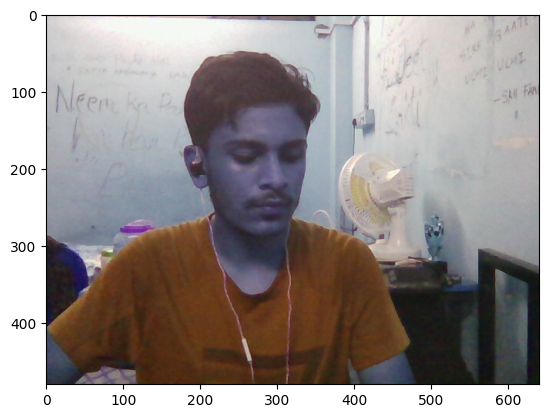

In [15]:
plt.imshow(frame)

In [16]:
frame.shape

(480, 640, 3)

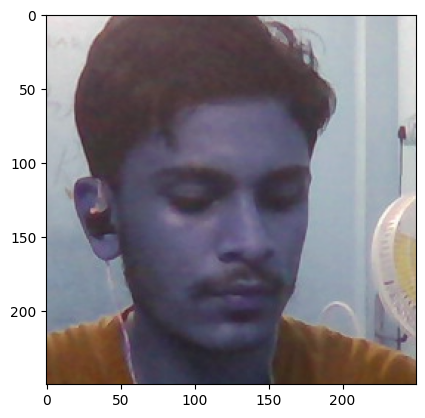

In [26]:
plt.imshow(frame[60:60+250, 160:160+250, :])

In [28]:
import uuid

In [304]:
# Testing the webcam
    
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()

    frame = frame[60:60+250, 160:160+250, :]

    if cv2.waitKey(1) & 0XFF == ord('a'):  #Anchor 
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    if cv2.waitKey(1) & 0XFF == ord('p'):  #Positive
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)

    cv2.imshow('Image Collection', frame)

    if cv2.waitKey(1) & 0XFF==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [318]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(1800)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(2000)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(2000)

<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
<>:1: SyntaxWarning: invalid escape sequence '\*'
<>:2: SyntaxWarning: invalid escape sequence '\*'
<>:3: SyntaxWarning: invalid escape sequence '\*'
C:\Users\aryan\AppData\Local\Temp\ipykernel_18288\3565913541.py:1: SyntaxWarning: invalid escape sequence '\*'
  anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(1800)
C:\Users\aryan\AppData\Local\Temp\ipykernel_18288\3565913541.py:2: SyntaxWarning: invalid escape sequence '\*'
  positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(2000)
C:\Users\aryan\AppData\Local\Temp\ipykernel_18288\3565913541.py:3: SyntaxWarning: invalid escape sequence '\*'
  negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(2000)


In [31]:
dir_test = anchor.as_numpy_iterator()

In [44]:
print(dir_test.next())

b'data\\anchor\\6c8bd32b-7c39-11f0-a364-b72e15c4e2b4.jpg'


In [319]:
def preprocess(file_path):
    byte_img = tf.io.read_file(file_path)
    img = tf.io.decode_jpeg(byte_img)
    img = tf.image.resize(img, (100,100))
    img = img / 255.0
    return img

In [45]:
img = preprocess('data\\anchor\\6c8bd32b-7c39-11f0-a364-b72e15c4e2b4.jpg')

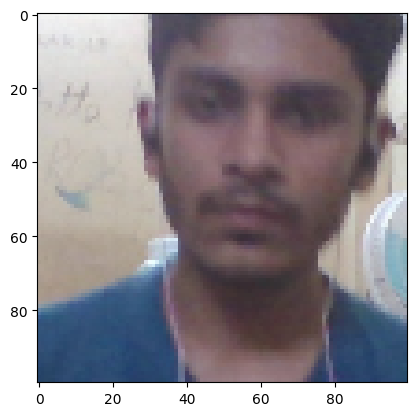

In [46]:
plt.imshow(img)

In [320]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

# Anchor + Positive = 1(Label)
# Anchor + Negative = 0(Label)

In [51]:
samples = data.as_numpy_iterator()

In [68]:
samples.next()

(b'data\\anchor\\682de4ed-7c39-11f0-a511-b72e15c4e2b4.jpg',
 b'data\\positive\\91c4ab46-7c39-11f0-89ee-b72e15c4e2b4.jpg',
 np.float32(1.0))

In [321]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [74]:
example = samples.next()

In [75]:
res = preprocess_twin(*example)
res

(<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
 array([[[0.93921566, 0.9431372 , 0.95098037],
         [0.95955884, 0.9644608 , 0.96936274],
         [0.9617647 , 0.96960783, 0.96568626],
         ...,
         [0.6911765 , 0.6958333 , 0.7014706 ],
         [0.67034316, 0.6742647 , 0.68210787],
         [0.75441176, 0.7583333 , 0.7681373 ]],
 
        [[0.9411765 , 0.94509804, 0.9529412 ],
         [0.9468137 , 0.95465684, 0.9507353 ],
         [0.9470588 , 0.95490193, 0.94509804],
         ...,
         [0.69240195, 0.7127451 , 0.7267157 ],
         [0.73112744, 0.74289215, 0.7406863 ],
         [0.73333335, 0.7411765 , 0.72745097]],
 
        [[0.9375    , 0.94436276, 0.9433824 ],
         [0.9401961 , 0.94803923, 0.94264704],
         [0.9463235 , 0.95416665, 0.94289213],
         ...,
         [0.7012255 , 0.72818625, 0.7556372 ],
         [0.7345588 , 0.75784314, 0.7607843 ],
         [0.8036765 , 0.82058823, 0.797549  ]],
 
        ...,
 
        [[0.18995099, 0.28014705

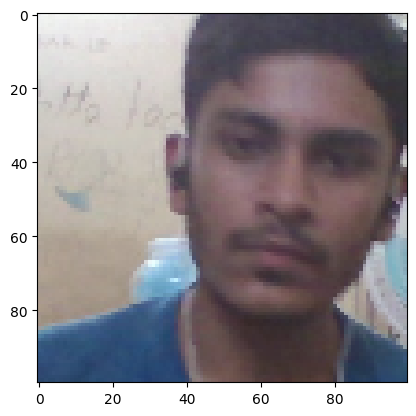

In [192]:
plt.imshow(res[0])

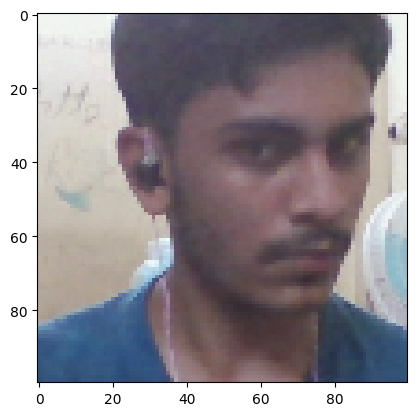

In [76]:
plt.imshow(res[1])

In [77]:
res[2]

np.float32(1.0)

In [322]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [79]:
samples = data.as_numpy_iterator()

In [88]:
samp = samples.next()

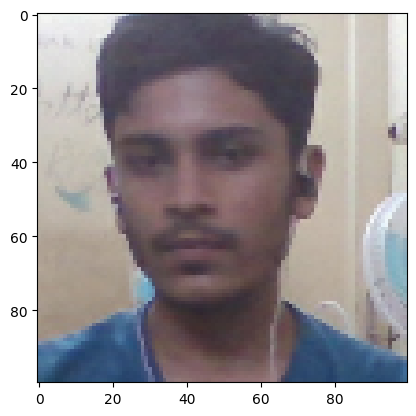

In [89]:
plt.imshow(samp[0])

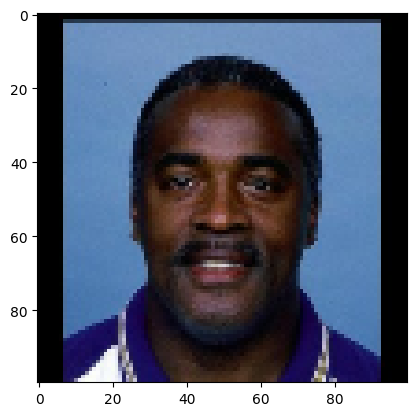

In [90]:
plt.imshow(samp[1])

In [91]:
samp[2]

np.float32(0.0)

In [323]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [324]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [326]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    # return Model(inputs=[inp], outputs=[d1], name='embedding')
    return Model(inputs=inp, outputs=d1, name='embedding')

In [327]:
embedding = make_embedding()

In [328]:
embedding.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [329]:
class L1Dist(Layer):
    
    def __init__(self, **kwargs):
        super().__init__()
       
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [330]:
l1 = L1Dist()

In [332]:
def make_siamese_model(): 
    
    input_image = Input(name='input_img', shape=(100,100,3))
    
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
     
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [333]:
siamese_layer = L1Dist()

In [334]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))

In [335]:
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)

In [336]:
siamese_layer(inp_embedding, val_embedding)

<KerasTensor shape=(None, 4096), dtype=float32, sparse=False, ragged=False, name=keras_tensor_158>

In [337]:
siamese_model = make_siamese_model()

In [338]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_18 (L1Dist) │ (None, 4096)      │          0 │ embedding[2][0],  │
│                     │                   │            │ embedding[3][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │      4,097 │ l1_dist_18[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [339]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [340]:
opt = tf.keras.optimizers.Adam(1e-4) # 0.0001

In [341]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [342]:
test_batch = train_data.as_numpy_iterator()

In [343]:
batch_1 = test_batch.next()

In [344]:
X = batch_1[:2]

In [345]:
np.array(X).shape

(2, 16, 100, 100, 3)

In [346]:
y = batch_1[2]

In [347]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)

In [348]:
@tf.function
def train_step(batch):
    
    with tf.GradientTape() as tape:     
        X = batch[:2]
        y = batch[2]
        
        yhat = siamese_model(X, training=True)
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    
    return loss

In [314]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
print("Built with CUDA:", tf.test.is_built_with_cuda())


Num GPUs Available: 0
Built with CUDA: False


In [351]:
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        for idx, batch in enumerate(data):
            train_step(batch)
            progbar.update(idx+1)
        
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [352]:
EPOCHS = 50

In [353]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
157/158 ━━━━━━━━━━━━━━━━━━━━ 0s 758ms/stepTensor("binary_crossentropy/div_no_nan:0", shape=(), dtype=float32)
158/158 ━━━━━━━━━━━━━━━━━━━━ 122s 758ms/step

 Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 118s 741ms/step

 Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 119s 749ms/step

 Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 117s 736ms/step

 Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 117s 739ms/step

 Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 117s 734ms/step

 Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 125s 787ms/step

 Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 118s 741ms/step

 Epoch 9/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 120s 760ms/step

 Epoch 10/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 123s 775ms/step

 Epoch 11/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 132s 830ms/step

 Epoch 12/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 131s 826ms/step

 Epoch 13/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 122s 770ms/s

In [354]:
from tensorflow.keras.metrics import Precision, Recall

In [355]:
test_data.as_numpy_iterator().next()

(array([[[[0.8745098 , 0.8901961 , 0.9019608 ],
          [0.8933824 , 0.90612745, 0.91887254],
          [0.9014706 , 0.90539217, 0.91519606],
          ...,
          [0.87647057, 0.8960784 , 0.8745098 ],
          [0.8872549 , 0.9098039 , 0.9       ],
          [0.8892157 , 0.9127451 , 0.904902  ]],
 
         [[0.8806372 , 0.8845588 , 0.9002451 ],
          [0.8843137 , 0.8882353 , 0.90343136],
          [0.8882353 , 0.89215684, 0.9014706 ],
          ...,
          [0.88039213, 0.9       , 0.87990195],
          [0.8808824 , 0.90343136, 0.89362746],
          [0.877451  , 0.9009804 , 0.8931373 ]],
 
         [[0.8737745 , 0.8776961 , 0.8933824 ],
          [0.872549  , 0.87647057, 0.8901961 ],
          [0.88308823, 0.8870098 , 0.89485294],
          ...,
          [0.8901961 , 0.90906864, 0.8955882 ],
          [0.87671566, 0.8985294 , 0.89093137],
          [0.8637255 , 0.8872549 , 0.87941176]],
 
         ...,
 
         [[0.14632353, 0.26887256, 0.43063724],
          [0.14901

In [356]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [357]:
y_hat = siamese_model.predict([test_input, test_val])
y_hat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step


array([[1.7220227e-03],
       [9.5298797e-01],
       [1.6730631e-03],
       [6.5145706e-04],
       [2.0612639e-03],
       [2.5235349e-03],
       [1.0823820e-03],
       [3.8690437e-03],
       [9.9993932e-01],
       [2.5826555e-03],
       [9.9470818e-01],
       [1.3915793e-03],
       [1.7374577e-03],
       [1.2379106e-05],
       [3.0624021e-03],
       [2.6552738e-03]], dtype=float32)

In [358]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]

In [359]:
y_true

array([0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
      dtype=float32)

In [360]:
m = Recall()
 
m.update_state(y_true, y_hat)

m.result().numpy()

np.float32(1.0)

In [361]:
m = Precision()
 
m.update_state(y_true, y_hat)

m.result().numpy()

np.float32(1.0)

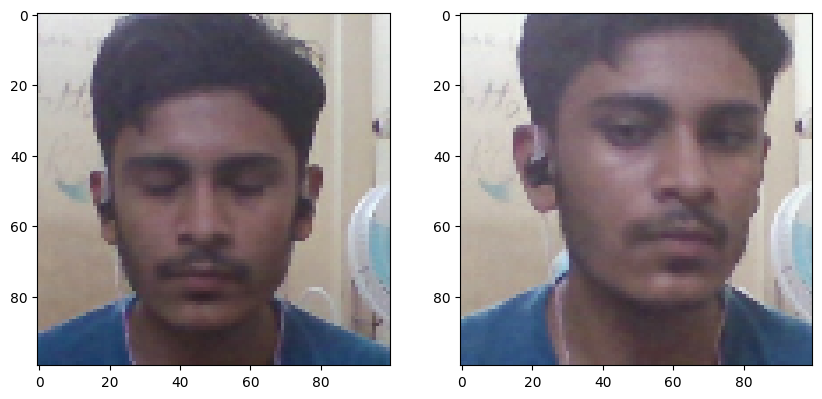

In [289]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.imshow(test_input[0])

plt.subplot(1,2,2)
plt.imshow(test_val[0])

plt.show()

In [290]:
print(y_true[0])
print(y_hat[0])

1.0
[1.]


In [362]:
siamese_model.save('siamesemodel.h5')

In [363]:
model = tf.keras.models.load_model('siamesemodel.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [364]:
model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


array([[1.7220227e-03],
       [9.5298797e-01],
       [1.6730631e-03],
       [6.5145706e-04],
       [2.0612639e-03],
       [2.5235349e-03],
       [1.0823820e-03],
       [3.8690437e-03],
       [9.9993932e-01],
       [2.5826555e-03],
       [9.9470818e-01],
       [1.3915793e-03],
       [1.7374577e-03],
       [1.2379106e-05],
       [3.0624021e-03],
       [2.6552738e-03]], dtype=float32)

In [365]:
model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_img           │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_img      │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_img[0][0],  │
│ (Functional)        │                   │            │ validation_img[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_19 (L1Dist) │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │      4,097 │ l1_dist_19[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [295]:
def verify(model, detection_threshold, verification_threshold):
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    detection = np.sum(np.array(results) > detection_threshold)
    
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [370]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[60:60+250, 160:160+250, :]
    
    cv2.imshow('Verification', frame)

    if cv2.waitKey(10) & 0xFF == ord('v'): 
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        results, verified = verify(model, 0.9, 0.75)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━

In [369]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.version())
print(torch.cuda.is_available())

2.8.0+cpu
None
None
False
